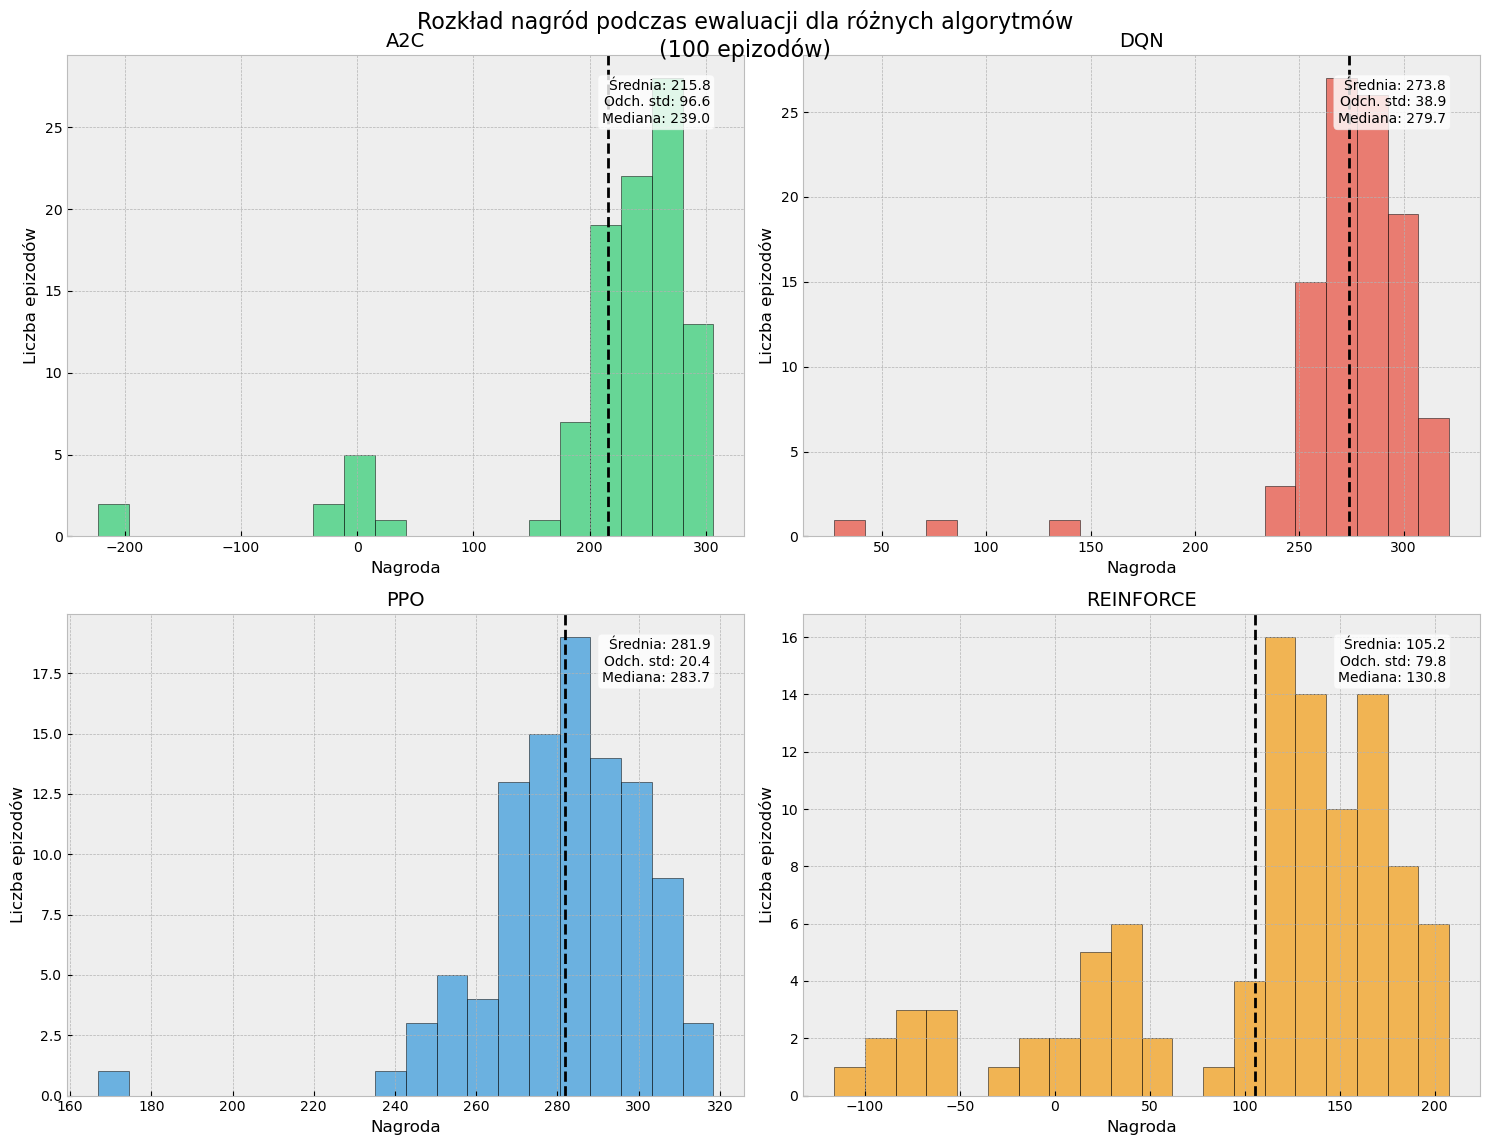


Statystyki ewaluacji:

A2C:
Średnia nagroda: 215.8
Odchylenie standardowe: 96.6
Mediana: 239.0
Min: -222.8
Max: 306.5

DQN:
Średnia nagroda: 273.8
Odchylenie standardowe: 38.9
Mediana: 279.7
Min: 27.1
Max: 321.9

PPO:
Średnia nagroda: 281.9
Odchylenie standardowe: 20.4
Mediana: 283.7
Min: 166.9
Max: 318.4

REINFORCE:
Średnia nagroda: 105.2
Odchylenie standardowe: 79.8
Mediana: 130.8
Min: -116.3
Max: 207.7


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wczytaj dane
a2c_data = pd.read_csv('results/a2c_evaluation_results.csv')
dqn_data = pd.read_csv('results/dqn_evaluation_results.csv')
ppo_data = pd.read_csv('results/ppo_evaluation_results.csv')
reinforce_data = pd.read_csv('results/reinforce_evaluation_results.csv')

# Ustawienia wykresów
plt.style.use('bmh')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Rozkład nagród podczas ewaluacji dla różnych algorytmów\n(100 epizodów)', 
             fontsize=16, y=0.95)

# Kolory dla każdego algorytmu
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12']

# Funkcja do dodawania statystyk na wykresie
def add_stats_text(ax, data, color):
    mean = data['Reward'].mean()
    std = data['Reward'].std()
    median = data['Reward'].median()
    
    stats_text = f'Średnia: {mean:.1f}\nOdch. std: {std:.1f}\nMediana: {median:.1f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=props,
            fontsize=10)

# A2C histogram
ax = axes[0, 0]
ax.hist(a2c_data['Reward'], bins=20, color=colors[0], alpha=0.7, edgecolor='black')
ax.axvline(a2c_data['Reward'].mean(), color='black', linestyle='dashed', linewidth=2)
ax.set_title('A2C', fontsize=14)
ax.set_xlabel('Nagroda')
ax.set_ylabel('Liczba epizodów')
add_stats_text(ax, a2c_data, colors[0])

# DQN histogram
ax = axes[0, 1]
ax.hist(dqn_data['Reward'], bins=20, color=colors[1], alpha=0.7, edgecolor='black')
ax.axvline(dqn_data['Reward'].mean(), color='black', linestyle='dashed', linewidth=2)
ax.set_title('DQN', fontsize=14)
ax.set_xlabel('Nagroda')
ax.set_ylabel('Liczba epizodów')
add_stats_text(ax, dqn_data, colors[1])

ax = axes[1, 0]
ax.hist(ppo_data['Reward'], bins=20, color=colors[2], alpha=0.7, edgecolor='black')
ax.axvline(ppo_data['Reward'].mean(), color='black', linestyle='dashed', linewidth=2)
ax.set_title('PPO', fontsize=14)
ax.set_xlabel('Nagroda')
ax.set_ylabel('Liczba epizodów')
add_stats_text(ax, ppo_data, colors[2])

ax = axes[1, 1]
ax.hist(reinforce_data['Reward'], bins=20, color=colors[3], alpha=0.7, edgecolor='black')
ax.axvline(reinforce_data['Reward'].mean(), color='black', linestyle='dashed', linewidth=2)
ax.set_title('REINFORCE', fontsize=14)
ax.set_xlabel('Nagroda')
ax.set_ylabel('Liczba epizodów')
add_stats_text(ax, reinforce_data, colors[3])

plt.tight_layout()

plt.savefig('evaluation_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStatystyki ewaluacji:")
algorithms = {
    'A2C': a2c_data,
    'DQN': dqn_data,
    'PPO': ppo_data,
    'REINFORCE': reinforce_data
}

for name, data in algorithms.items():
    print(f"\n{name}:")
    print(f"Średnia nagroda: {data['Reward'].mean():.1f}")
    print(f"Odchylenie standardowe: {data['Reward'].std():.1f}")
    print(f"Mediana: {data['Reward'].median():.1f}")
    print(f"Min: {data['Reward'].min():.1f}")
    print(f"Max: {data['Reward'].max():.1f}")